In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Fpre(x,y):
    return y,0

F = np.vectorize(Fpre)

In [3]:
axes = np.linspace(-3,3,10)
X,Y = np.meshgrid(axes,axes)

## Plot $F(x,y) = (y,0)$

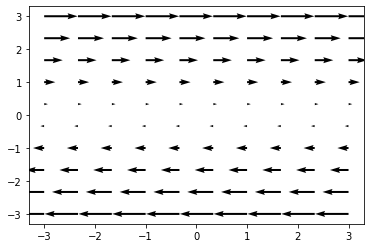

In [4]:
U,V = F(X,Y)
plt.quiver(X,Y,U,V)

## Plot curve parametrized by $r(t) = (t,3\sin(t))$ together with tangent vectors

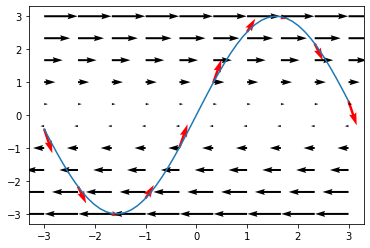

In [5]:
x,y = np.linspace(-3,3,50),3*np.sin(np.linspace(-3,3,50))
u,v = [1 for _ in axes],[3*np.cos(t) for t in axes]
plt.plot(x,y)

#vectors are not to-scale for aesthetic reasons
plt.quiver(axes,3*np.sin(axes),u,v,color='red')
plt.quiver(X,Y,U,V)

## What do you think the integral of the vector field $F$ over the curve parametrized by $r(t)$ will be if we let $t$ range from $-\pi$ to $\pi$?

## To compute integrals of vector fields over curves, first normalize the tangent vectors

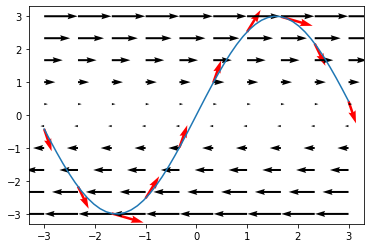

In [6]:
#normalize the tangent vectors
tvecs = np.array(list(zip(u,v)))
norms = np.linalg.norm(tvecs,axis=-1)
normalized_tvecs = tvecs/np.array([norms,norms]).T

plt.plot(x,y)
#vectors are not to-scale for aesthetic reasons.
plt.quiver(axes,3*np.sin(axes),normalized_tvecs[:,0],normalized_tvecs[:,1],color='red',scale=1.5,scale_units='xy')
plt.quiver(X,Y,U,V)

## Then add up the components of the vector field in the direction of the (normalized) tangent vectors

In [8]:
VFieldx,VFieldy = F(axes,3*np.sin(axes))

In [9]:
VField = np.array([VFieldx,VFieldy]).T

In [10]:
#this is just a "clever" way of computing the dot product and adding all at once
#multiplication between numpy arrays is element-wise multiplication
Integral = sum((VField*normalized_tvecs).flatten())

In [11]:
display(Integral)

2.220446049250313e-15

## Did you guess zero as the answer? This number is so small that it's essentially zero. Let's compute the answer analytically.

$$ \int_{-\pi}^\pi F \cdot dr = \int_{-\pi}^\pi \langle 3\sin t,0\rangle \cdot \langle 1,3\cos t\rangle \, dt = \int_{-\pi}^\pi 3\sin t \, dt= 3 \cos t \mid_{-\pi}^\pi = 0$$

## Is the vector field $F(x,y) = (y,0)$ conservative? If it is, then the integral along any closed curve (i.e. start point of curve equals end point) should be zero

In [12]:
# Consider the curve defined by a circle
circle_pts = [(3*np.sin(t),3*np.cos(t)) for t in np.linspace(0,2*np.pi,30,endpoint=False)]
circlex = [pt[0] for pt in circle_pts]
circley = [pt[1] for pt in circle_pts]
# tangent vectors
tan_vecs = [(3*np.cos(t),-3*np.sin(t)) for t in np.linspace(0,2*np.pi,30,endpoint=False)]
tanx = [pt[0] for pt in tan_vecs]
tany = [pt[1] for pt in tan_vecs]

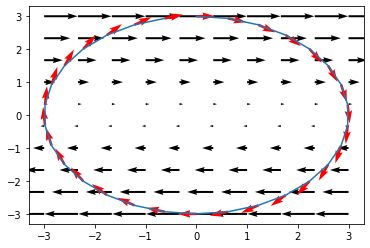

In [13]:
plt.plot(circlex,circley)
plt.quiver(X,Y,U,V)
plt.quiver(circlex,circley,tanx,tany,color='red')

## It doesn't look like the integral along this curve will be zero. Let's compute it:

$$ \int_0^{2\pi} F \cdot dr = \int_0^{2\pi} \langle 3\cos(t),0\rangle \cdot \langle 3\cos(t),-3\sin(t)\rangle \, dt = \int_0^{2\pi} \cos^2(t) \, dt = \pi$$

### This alone is enough to show that $F$ is not conservative. How else could we have seen this? 

If $F$ is conservative, then $F = \nabla f = \langle f_x,f_y \rangle$ for some function $f$. Write $P = y$ and $Q = 0$ so that $F = \langle P,Q \rangle$. If $F$ is conservative, then $P_y = f_{xy}$ and $Q_x = f_{yx}$. By equality of mixed second partials, we would have $P_y = Q_x$. However, this is clearly false, since $P_y = 1, Q_x = 0$. This is another way to see that $F$ is not conservative, and it's the easiest method to use in practice. 

- If $P_y \neq Q_x$, then $F$ is never conservative.
- If $P_y = Q_x$ AND $F$ is defined on a simply connected domain, then $F$ is conservative.


To see that the simply connected assumption on the domain is required, consider the vector field $$G(x,y) = \left(\frac{-y}{x^2+y^2},\frac{x}{x^2+y^2} \right)$$.

Note that the domain of this vector field doesn't include the point $(0,0)$.

In [24]:
def Gpre(x,y):
    return (-y/(x**2+y**2),x/(x**2+y**2))

G = np.vectorize(Gpre)

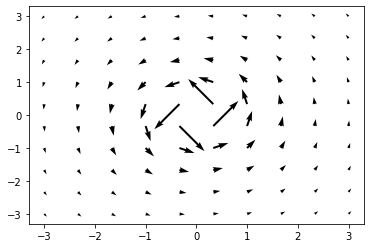

In [25]:
U,V = G(X,Y)
plt.quiver(X,Y,U,V,scale=20)

### Hopefully it's clear from the picture that we can integrate this vector field over a circle to get a non-zero integral, so that the vector field is NOT conservative

On the other hand, if we denote $G(x,y) = \langle P,Q \rangle$, then $$P_y = \frac{-(x^2 + y^2)+2y^2}{(x^2 + y^2)^2} = \frac{y^2-x^2}{(x^2 + y^2)^2}$$
$$Q_x = \frac{(x^2+y^2)-2x^2}{(x^2 + y^2)^2} = \frac{y^2-x^2}{(x^2 + y^2)^2}$$

so that $P_y = Q_x$ even though $G$ is not conservative.

### Finally, why are conservative vector fields "conservative"?

Kinetic energy is the energy required to do work. Rephrasing, given an initial position of some rigid body $(x_i,y_i)$, Kinetic energy is the energy required to move the body from $(x_i,y_i)$ to $(x_f,y_f)$. 

That is, if we choose a path $C$ from $(x_i,y_i)$ to $(x_f,y_f)$ and a force field $F$, then $$KE_f - KE_i = \int_C F \cdot d\mathbf{r}.$$

If $F$ is a conservative vector field, choose a potential function $f$ so that $\nabla f = F$. Define the potential energy to be $PE = -f$. By the fundamental theorem of line integrals, we have $$KE_f - KE_i = -PE_f + PE_i.$$ Rewriting this as $$KE_f+PE_f = KE_i+PE_i,$$ we recover the conservation of energy.

To check that I'm not pulling these definitions out of nowhere, note that if $F = (0,-mg)$ is the vector field corresponding to a constant gravitational force, then $f = -mgy$ is a potential function. Setting $PE = -f = mgy$ we recover the usual definition of gravitational potential energy.